# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# **Part 1) Load the data and make a datetime index.**


## Load Data

In [2]:
url="https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/pub?output=csv"
df = pd.read_csv(url)

In [3]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


### 1. Convert the date column to datetime dtype.

In [5]:
#convert the date column values into 'datetime' dtype.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

Note: At first, I did not add ", format='%Y%m%d'" in the above code when converting to datetime dtype, and it converted every line to 1970-01-01 (which I did not notice at the beginning). I only realized that something is wrong when I tried to make the filter for year 2000 onwards and the filter acted like there are no data for 2000 onwards, then I remembered the [example from Learn Platform](https://login.codingdojo.com/m/565/12978/97193) and fixed my code.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [7]:
df.head(2)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


### 2. Set the date column as the index.

In [8]:
# set 'datetime' as the index
df = df.set_index('date')

In [9]:
df.head(2)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


### 3. Filter out only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
   - precipitation
   - mean_temp
   - min_temp
   - max_temp
   - snow_depth

In [10]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [11]:
# Keep only data from the year 2000 or later.
# Create a filter to do this
filter1 = df.index >= "2000"

In [12]:
# Apply filter1
df = df.loc[filter1]

In [13]:
# Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df[['precipitation','mean_temp','min_temp','max_temp', 'snow_depth']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [15]:
df.head(2)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0


### 4. Impute any missing values.
Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [16]:
#display the number of missing values for each feature
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

#### **`precipitation`**

In [17]:
df['precipitation'].value_counts()

0.0     3663
0.2      689
0.4      289
0.6      176
1.0      159
        ... 
31.2       1
24.4       1
26.0       1
29.2       1
31.0       1
Name: precipitation, Length: 145, dtype: int64

**Imputation Method**: Backward-Fill

**Justification**: For precipitation, it makes sense to fill in the missing value with either Forward-Fill or Backward-Fill, because: 
- if the day before and the day after the missing value had a non-zero precipitation, it is likely that the day of missing value also had a non-zero precipitation
- if the day before and the day after the missing value had 0 precipitation, then it is likely that the day of missing value also had 0 precipitation.

For this assignment, I will use "Backward-Fill" for **precipitation** feature. 

I will impute the missing value with the value observed on the **day before** the missing value.

In [18]:
df['precipitation'] = df['precipitation'].fillna(method='bfill')

#### **`mean_temp`**

**Imputation Method**: Interpolation

**Justification**: The temperature should not vary drastically from one day to another, therefore, it makes sense to use .interpolate() to fill in the missing values with a value that falls between the previous known value and the next known value.

In [19]:
df['mean_temp'] = df['mean_temp'].interpolate()

#### **`min_temp`**

**Imputation Method**: Interpolation

**Justification**: The temperature should not vary drastically from one day to another, therefore, it makes sense to use .interpolate() to fill in the missing values with a value that falls between the previous known value and the next known value.

In [20]:
df['min_temp'] = df['min_temp'].interpolate()

#### **`max_temp`**

**Imputation Method**: Interpolation

**Justification**: The temperature should not vary drastically from one day to another, therefore, it makes sense to use .interpolate() to fill in the missing values with a value that falls between the previous known value and the next known value.

In [21]:
df['max_temp'] = df['max_temp'].interpolate()

#### **`snow_depth`**

In [22]:
df['snow_depth'].value_counts()

0.0     5865
1.0       18
2.0       17
3.0        9
4.0        4
7.0        2
5.0        2
12.0       1
6.0        1
Name: snow_depth, dtype: int64

**Imputation Method**: Forward Fill

**Justification**: Impute the missing value with the value observed on the day after the missing value to avoid discontinuity.
    

In [23]:
df['snow_depth'] = df['snow_depth'].fillna(method='ffill')

In [24]:
#check to make sure that all missing values have been imputed.
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# **Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)**

## Q1: What month had the most precipitation between 2000 through 2010?

In [25]:
#prepare a copy of data for Q1
Q1_prec = df['precipitation'].copy()

In [26]:
#create a filter to filter data between 2000 through 2010
filter_q1 = Q1_prec.index <= '2010-12-31'

In [27]:
#apply the filter
Q1_prec = Q1_prec [filter_q1]

In [28]:
#confirm that the filter is working
Q1_prec.tail()

date
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, dtype: float64

In [29]:
# Resample the data as Monthly frequency.
Q1_prec = Q1_prec.asfreq("M")
Q1_prec.head(5)

date
2000-01-31    0.0
2000-02-29    5.6
2000-03-31    0.0
2000-04-30    0.0
2000-05-31    1.4
Freq: M, Name: precipitation, dtype: float64

In [30]:
# Find the date and corresponding value for the max precipitation.
max_date = Q1_prec.idxmax()
max_date

Timestamp('2002-04-30 00:00:00', freq='M')

In [31]:
# Find the value for the max precipitation
Q1_prec[Q1_prec.index == '2002-04-30 00:00:00']

date
2002-04-30    13.8
Freq: M, Name: precipitation, dtype: float64

In [32]:
#double-check
Q1_prec.sort_values(ascending=False)

date
2002-04-30    13.8
2008-08-31    13.4
2007-06-30    12.0
2002-12-31    11.8
2006-09-30    11.4
              ... 
2004-11-30     0.0
2004-10-31     0.0
2004-08-31     0.0
2004-07-31     0.0
2010-12-31     0.0
Name: precipitation, Length: 132, dtype: float64

**April 2002** had the most precipitation between 2000 through 2010, and the value of precipitation was **13.8**.

**Plot**

In [33]:
Q1_prec.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=132, freq='M')

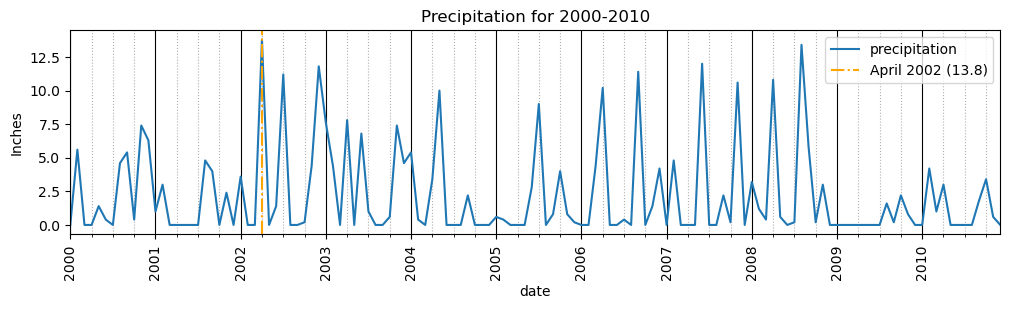

In [46]:
fig, ax = plt.subplots(figsize=(12,3))
Q1_prec.plot(ax = ax, title='Precipitation for 2000-2010', ylabel='Inches')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
# Add a line for the max precipitation date and value
ax.axvline(max_date, color = 'orange', ls ="-.", label=f'April 2002 ({Q1_prec.max()})')
ax.legend();

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [47]:
#prepare a copy of data for Q2
Q2_temp = df['mean_temp'].copy()

In [49]:
#create a filter to filter data between 2000 through 2020
filter_q2 = Q2_temp.index <= '2020-12-31'

In [50]:
#apply the filter
Q2_temp = Q2_temp [filter_q2]

In [53]:
#confirm that the filter is working
print(Q2_temp.head(3))
print(Q2_temp.tail(3))

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
Name: mean_temp, dtype: float64
date
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, dtype: float64


In [54]:
# Resample the data as Yearly frequency.
Q2_temp = Q2_temp.asfreq("Y")
Q2_temp.head(5)

date
2000-12-31     2.8
2001-12-31     1.0
2002-12-31     7.3
2003-12-31     3.3
2004-12-31    10.6
Freq: A-DEC, Name: mean_temp, dtype: float64

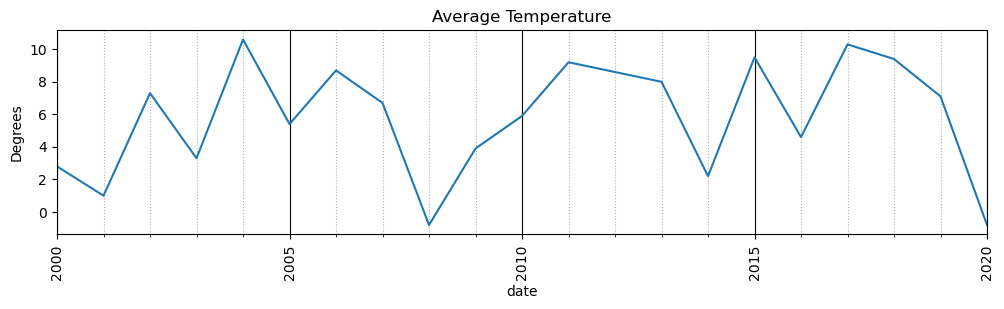

In [58]:
fig, ax = plt.subplots(figsize=(12,3))
Q2_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

In [59]:
# Determine the date and value for the lowest mean temp.
min_date = Q2_temp.idxmin()
min_date

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [60]:
# Find the value for the max precipitation
Q2_temp[Q2_temp.index == '2008-12-31 00:00:00']

date
2008-12-31   -0.8
Freq: A-DEC, Name: mean_temp, dtype: float64

In [61]:
##Double-check
Q2_temp.sort_values(ascending=True)

date
2020-12-31    -0.8
2008-12-31    -0.8
2001-12-31     1.0
2014-12-31     2.2
2000-12-31     2.8
2003-12-31     3.3
2009-12-31     3.9
2016-12-31     4.6
2005-12-31     5.4
2010-12-31     5.9
2007-12-31     6.7
2019-12-31     7.1
2002-12-31     7.3
2013-12-31     8.0
2012-12-31     8.6
2006-12-31     8.7
2011-12-31     9.2
2018-12-31     9.4
2015-12-31     9.5
2017-12-31    10.3
2004-12-31    10.6
Name: mean_temp, dtype: float64

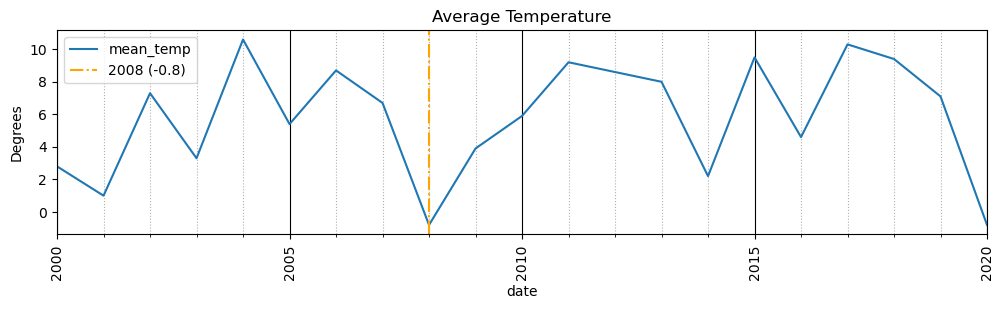

In [63]:
fig, ax = plt.subplots(figsize=(12,3))
Q2_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

# Add a line for the max precipitation date and value
ax.axvline(min_date, color = 'orange', ls ="-.", label=f'2008 ({Q2_temp.min()})')
ax.legend();